<p>

# FIT5196 Assessment 2
#### Student Name: Anirban Roy Chowdhury
#### Student ID: 30539676

Date: 12/10/20

Version: 1.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

Libraries used:

* pandas - For data manipulation
* sklearn - For linear models
* matplotlib - For plotting graphs
* nltk - For sentiment analysis
* numpy - For mathematical and matrix operation
* yellowbrick - For Cook's distance and Residual plot

</p>

In [1]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import CooksDistance
from itertools import chain
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## Table of Contents

1. [Introduction](#sec_1)
2. [Methodology - Dirty Data](#sec_2)
3. [Methodology - Missing Data](#sec_3)
4. [Methodology - Outlier Data](#sec_4)
5. [Summary](#sec_5)
6. [References](#sec_8)

<p>

# 1. Introduction<a class="anchor" id="sec_1"></a>

We have been given with three files. The files contain:
   * Dirty data
   * Outlier data
   * Missing data

These dataset revolve around orders placed from an online electronics store in Melbourne. Each data set contains <b>500 rows and 16 attributes</b>. Each row represent an order.

Our tasks in as follows:
* Read & Process all the data.
* Clean the dirty data in dirty data
* Find missing values in missing data.
* Find outliers w.r.t 'delivery_charges' in ourliers data.

More details for each task will be given in the following sections.

Before we start looking at each attribute individually, we can have a cursory look at the entire dataset, to make sure nothing is out of the ordinary. Following this will be checked at this stage:

* Types of variable
* Brief statistical descriptions of the variables
</p>

In [2]:
df_dirty_data = pd.read_csv('30539676_dirty_data.csv')
df_missing_data = pd.read_csv('30539676_missing_data.csv')
df_outlier_data = pd.read_csv('30539676_outlier_data.csv')
warehouse_loc = pd.read_csv('warehouses.csv')

In [3]:
df_dirty_data.shape

(500, 16)

In [4]:
df_dirty_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,14340.55000,76.938340,-27.942060,135.095884,10.950000,12882.40174,1.098041
std,8098.07425,13.908523,41.353517,41.353177,8.933483,7297.50148,0.492837
min,1010.00000,47.270000,-37.827738,-37.829985,0.000000,832.39000,0.026500
25%,8046.25000,66.100000,-37.818686,144.949407,5.000000,7274.95500,0.771500
50%,12980.00000,76.415000,-37.811829,144.962689,10.000000,11511.79500,1.058250
75%,19683.75000,84.062500,-37.804443,144.976857,15.000000,17357.58250,1.370650
max,43610.00000,111.850000,145.014854,145.018208,25.000000,41516.93000,2.721400


In [5]:
df_dirty_data.describe(include=['O'])

,order_id,customer_id,date,nearest_warehouse,shopping_cart,season,latest_customer_review
count,500,500,500,500,500,500,500
unique,500,493,296,6,468,8,500
top,ORD303189,ID4297530201,2019-07-11,Thompson,"[('iStream', 2), ('Toshika 750', 2)]",Autumn,good phone!! great 200 dollar phone. works wit...
freq,1,2,6,201,4,126,1


<p>
Initial Observation:
    
1. Warehouse have 6 unique values, there should only be 3.
2. Season also has 8 unique values, again there should only be 4.
3. Numerical Attributes-
    * order_price                      
    * delivery_charges                
    * customer_lat                     
    * customer_long                    
    * coupon_discount                  
    * order_total
4. Categorical Attributes-
    * order_id                         
    * customer_id                      
    * date                             
    * nearest_warehouse                
    * shopping_cart  


</p>

# 2. Methodology - Dirty Data<a class="anchor" id="sec_2"></a>
<p>
    
We will be clearing the dirty data column by column. Each column will be explored to find the anaomly and then fixed.   
Based on my working we have 3 main types of data anamolies:
    * Syntactic
    * Semantic
    * Coverage

As per the document specification, the following columns have no errors:
    * delivery_charges
    * coupon_discount
    * The ordered quantity values in the shopping_cart attribute

A brief descriptions of each erros found per column can be found below:
    
* <b>Date</b>:
    * Anomaly Type: Syntactic
    * there are 3 different formats within this column. As per the spec only the format 'yyyy-mm-dd' is considered valid.
* <b>Nearest_warehouse</b> :
    * Anomaly Type: Semantic
    * The nearest warehouse calculated according the given customer latitude and longitude.
* <b>Shopping_cart</b> : 
    * Anomaly Type: Semantic
    * We need to confirm that for all orders placed, the total number of unique producst are 10. This was indeed the case, hence no errors in this column.
* <b>Order_Price</b> : 
    * Anomaly Type: Semantic
    * We need to confirm if the total price of all the products in the shopping_cart column for a row, adds upto the price listed in order_price.
* <b>Customer Latititude and Longitude</b> :
    * Anomaly Type: Syntactic
    * Confirm weather the given coordinates are correct or not.
* <b>Order_total</b> :
    * Anomaly Type: Semantic
    * The total price of the order, the order_total should come out to be (order_price+deliver_charges)Xcoupon_discount.
* <b>Season</b> :
    * Anomaly Type: Semantic
    * We will be confirming if the season is indeed correct according to the date recorded and the given specification for months to season. 
* <b>Distance_to_nearest_warehouse</b> :
    * Anomaly Type: Semantic
    * The nearest warehouse calculated according the given customer latitude and longitude.
* <b>latest_customer_review</b> :
    * Anomaly Type: Semantic 
    * We can't clean the data since, every user will have a different way of writing. At max we can get all reviews in the same capitalization.
* <b>is_happy_customer</b> :
    * Anomaly Type: Semantic
    * based on the polarity scored returned after doing a sentiment analysis on the customer review, we will be checking if the value for this column is indeed correct.

After the correction of each type of data anamoly I check again to make sure the changed made have actually taken effect.


</p>

## Dates - Syntactical Anomaly

<p>

As per our specification the correct format of the date in which it should have been recorded is 'yyyy-mm-dd', however it seems that such is not the case for all dates. I have been able to identify 3 different dates format, which are :

    * YYYY-MM-DD
    * YYYY-DD-MM
    * DD-MM-YYYY

We will be using the .to_datetime() function to convert these 3 date format back to our desired format. 

We will first create a temporary column were are newly formated dates will be kept and then the column will be renamed accordingly.
</p>

In [6]:
# https://stackoverflow.com/questions/51822956/change-dd-mm-yyyy-date-format-of-dataframe-date-column-to-yyyy-mm-dd
#Convert all date value to the default yyyy-mm-dd format
df_dirty_data['Formated_date'] = pd.to_datetime(df_dirty_data['date'], format='%Y-%m-%d',errors='coerce')
#Create a mask for all dates not correctly formated
mask = df_dirty_data.Formated_date.isnull()
#Convert all dates that are in yyyy-dd-mm format
df_dirty_data.loc[mask,'Formated_date'] = pd.to_datetime(df_dirty_data[mask]['date'], format='%Y-%d-%m',errors='coerce')
#Create a mask for all dates not correctly formated
mask = df_dirty_data.Formated_date.isnull()
#Convert all dates that are in dd-mm-yyyy format
df_dirty_data.loc[mask,'Formated_date'] = pd.to_datetime(df_dirty_data[mask]['date'], format='%d-%m-%Y',errors='coerce')

In [7]:
df_dirty_data[['Formated_date','date']].head(100)

,Formated_date,date
0,2019-07-18,2019-07-18
1,2019-05-20,2019-05-20
2,2019-06-15,2019-06-15
3,2019-04-24,2019-04-24
4,2019-11-04,2019-11-04
...,...,...
95,2019-03-29,2019-03-29
96,2019-10-19,2019-10-19
97,2019-07-08,2019-07-08
98,2019-10-21,2019-10-21


In [8]:
# #Drop the column and rename the column
del df_dirty_data['date']
df_dirty_data.rename(columns={'Formated_date':'date'},inplace=True)

## Nearest Warehouse - Lexical Error

<p>
From our initial observation we know that there are 3 more values than required in this column, on doing a value_count() on the column below we see that for few of the rows the value recorded are in small-caps. <br>
While this is probably a small mistake while recording, this inconsistent capitalization might give us a problem later down the road. 
    
Based on the count of values, i have decided the replace the all-small capitalized version with their marjoirty format.

</p>

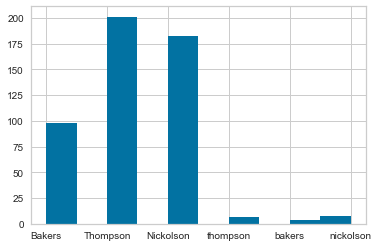

In [9]:
df_dirty_data['nearest_warehouse'].hist()

In [10]:
#Checking for unique counts
df_dirty_data.nearest_warehouse.value_counts()

Thompson     201
Nickolson    182
Bakers        98
nickolson      8
thompson       7
bakers         4
Name: nearest_warehouse, dtype: int64

In [11]:
# Correcting the spellings for nearest_warehouse
df_dirty_data.nearest_warehouse.replace({"thompson": "Thompson", "bakers": "Bakers", "nickolson":"Nickolson"}, inplace=True)
df_dirty_data.nearest_warehouse.value_counts()

Thompson     208
Nickolson    190
Bakers       102
Name: nearest_warehouse, dtype: int64

# Shopping cart

<p>
As per the assignment specification the counts given along iwth the items are correct. However the items themselves may be wrong. It is also mentioned that the store sells at max 10 unique items. By iterating over the column and collecting all the items and then taking the set of the generated list. We can see all the unique products sold by the company.
    
We also create another column where we convert the given string containing the values of the shopping cart into a python dictionary.
</p>

In [12]:
#Converting the value in the column to a dictionary for easier manipulation later on
df_dirty_data['shopping_cart_dict'] = df_dirty_data['shopping_cart'].apply(lambda x:dict(eval(x)))

In [13]:
collected_items = []
df_dirty_data['shopping_cart_dict'].apply(lambda x:collected_items.append(list(x.keys())))
#We can see only 10 unique variables as per the specification
print(set(list(chain.from_iterable(collected_items))))

{'Candle Inferno', 'Lucent 330S', 'Alcon 10', 'iStream', 'Thunder line', 'Olivia x460', 'pearTV', 'iAssist Line', 'Toshika 750', 'Universe Note'}


<p>
From the above query we can see that there are only 10 unique items sold by the store. This is in line with what has been told to us in the specification. The unique items are:
    
* Universe Note
* Toshika 750
* Candle Inferno
* iAssist Line
* pearTV
* Thunder line
* Lucent 330S
* iStream
* Olivia x460
* Alcon 10

</p>

## Order price - Semantic Error

<p>
Finding data anamoly wihtin order_price column is indeed difficult. The only column which directly effects order_price is shopping cart, unfortunately the price per product is not given. 
    
If we can calculate the price per product, then we can calculate the value for the shopping cart and comapre it with the recorded value.

<u>To calculate the price per product form the given data, we can take out 10 rows, where each unique product atleast appears once. Based on these 10 shopping cart and their order price, we can use linear algebra to calculate the value of each individual product.</u>

First we need 10 rows of data without any anaomalies in the shopping_cart and order_price columns. Based on these rows we can create our linear algebra equation.
</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB5D426550>]],
      dtype=object)

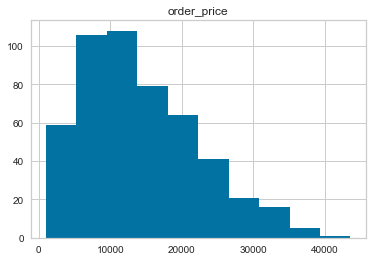

In [14]:
#Check distribution of order price
df_dirty_data.hist(column='order_price')

In [15]:
#Get rows with errors in other columns assider from order_price and shopping_cart
safe_df_for_order_price = df_dirty_data[df_dirty_data['customer_lat']+37>2]

<p>

Below 10 list of shopping_cart are the values which i will be using to build the linear algebra equations to solve to get the individual price per items.
</p>

In [16]:
#Iterate over each row in the column and append the shopping cart items into a list
collected_items = []
safe_df_for_order_price['shopping_cart'].apply(lambda x:collected_items.append(x))
collected_items

["[('Universe Note', 1), ('Lucent 330S', 1), ('iStream', 1)]",
 "[('Universe Note', 1), ('Lucent 330S', 1), ('Candle Inferno', 1), ('pearTV', 1)]",
 "[('iStream', 1), ('Lucent 330S', 1), ('Alcon 10', 2)]",
 "[('Lucent 330S', 2), ('iAssist Line', 1), ('Thunder line', 1)]",
 "[('iAssist Line', 1), ('Olivia x460', 2), ('Alcon 10', 2)]",
 "[('Thunder line', 1), ('Candle Inferno', 2), ('iAssist Line', 2)]",
 "[('Alcon 10', 2), ('Universe Note', 1), ('iAssist Line', 1), ('Thunder line', 2)]",
 "[('Candle Inferno', 2), ('iStream', 2), ('Universe Note', 2)]",
 "[('Olivia x460', 1), ('Lucent 330S', 2)]",
 "[('Universe Note', 1), ('Candle Inferno', 1), ('Alcon 10', 1), ('Lucent 330S', 2)]",
 "[('pearTV', 2), ('Thunder line', 1), ('Alcon 10', 1), ('Candle Inferno', 2)]",
 "[('Candle Inferno', 1), ('Thunder line', 1), ('Universe Note', 2)]",
 "[('Universe Note', 2), ('Thunder line', 1), ('Candle Inferno', 1)]",
 "[('Toshika 750', 1), ('iStream', 1), ('pearTV', 2)]",
 "[('iStream', 2), ('Universe N

<p>
Each of the row in the matrix 'A' represent the count of the item in its respective shopping cart order.
    
Each count in the array 'B' represent the respective order_price of the shopping cart.

The resultant values are the price per item. I have stored them into a dictionary for further use.
</p>

In [17]:
#Create the array according to the above data
a=np.array([[1,1,1,0,0,0,0,0,0,0],
            [1,1,0,1,1,0,0,0,0,0],
            [0,1,1,0,0,2,0,0,0,0],
            [0,2,0,0,0,0,1,0,1,0],
            [0,0,0,0,0,2,0,2,1,0],
            [0,0,0,2,0,0,1,0,2,0],
            [1,0,0,0,0,2,2,0,1,0],
            [2,0,2,2,0,0,0,0,0,0],
            [0,2,0,0,0,0,0,1,0,0],
            [0,0,1,0,2,0,0,0,0,1]])
b = np.array([4830,11420,19280,6865,22575,7490,27935,8060,3685,17090])
x = np.linalg.solve(a, b)
x

array([3450., 1230.,  150.,  430., 6310., 8950., 2180., 1225., 2225.,
       4320.])

In [18]:
#The final price per product as given above
item_to_price_dict = {'Olivia x460': 1225.0, 'iStream': 150.0, 'Thunder line': 2180.0, 'iAssist Line': 2225.0, 'Toshika 750': 4320.0, 'pearTV': 6310.0, 'Candle Inferno': 430.0, 'Universe Note': 3450.0, 'Alcon 10': 8950.0, 'Lucent 330S': 1230.0}

<p> 
We can now calculate the shopping cart price of all orders and the match them with the recorded values for order_price. The values of our calculated price and the recorded price should be the same.
</p>

In [19]:
#Function to calculate the value of the shopping_cart
def cal_shopping_cart_price(row,item_to_price_dict):
    total_price=0
    for key, value in row.shopping_cart_dict.items():
        total_price += item_to_price_dict[key]*value
    return total_price

In [20]:
#Calculate the value of the shopping_cart
df_dirty_data['cal_order_price']=df_dirty_data.apply(lambda x:cal_shopping_cart_price(x,item_to_price_dict),axis=1)

<p>
By comparing the values of calculated order price and the recorded order price, we can see those rows where data errors are in the column.
</p>

<p></p>

In [21]:
df_dirty_data.loc[(df_dirty_data.cal_order_price!=df_dirty_data.order_price),['cal_order_price','order_price']].count()

cal_order_price    54
order_price        54
dtype: int64

In [22]:
df_dirty_data.loc[(df_dirty_data.cal_order_price!=df_dirty_data.order_price),'order_price'] = df_dirty_data.cal_order_price

<p>By checkicking the count again we can make sure our changes have taken place.</p>

In [23]:
df_dirty_data.loc[(df_dirty_data.cal_order_price!=df_dirty_data.order_price),['cal_order_price','order_price']].count()

cal_order_price    0
order_price        0
dtype: int64

## Order Total - Semantic Errors

<p>
Since we have all the attributes that contribute to order total like delivery_charges, order_price and coupon_discount. 
    
We can directly calculate the order total and then compare them to the recorded value to check their validity.

Similar to how we did it for order_price

The formula used to calculate the order total is : $(orderPrice*(1-\frac{discount}{100}))+deliveryCharges$

</p>

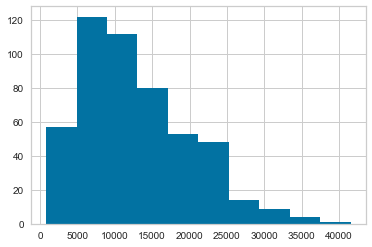

In [24]:
df_dirty_data['order_total'].hist()

In [25]:
# Function to check the order total values
def cal_order_total(row):
    # Discount Value
    discount = 1-(row["coupon_discount"]/100)
    # Returning the calculated total order price 
    return round((row["order_price"]*discount) + row["delivery_charges"],2)

In [26]:
#Calculate the order total in a new column for each row
df_dirty_data['cal_order_total'] = df_dirty_data.apply(lambda x: cal_order_total(x),axis=1)

In [27]:
#Rows where cal_order_total != order_total
df_dirty_data.loc[df_dirty_data.cal_order_total!=df_dirty_data.order_total,['order_total','cal_order_total']].head(10)

,order_total,cal_order_total
6,20312.29,18649.79
17,9243.00,23920.50
20,22064.78,12735.11
21,15342.39,6484.20
38,13819.68,11364.42
49,11679.84,2745.78
55,16728.90,19353.90
61,26356.34,13378.71
68,19911.71,28251.71
72,10383.17,8633.17


In [28]:
#count of rows where cal_order_total != order_total
df_dirty_data.loc[df_dirty_data.cal_order_total!=df_dirty_data.order_total,['order_total','cal_order_total']].count()

order_total        54
cal_order_total    54
dtype: int64

In [29]:
#Replacing incorrect order_total with our calculated order total
df_dirty_data.loc[df_dirty_data.cal_order_total!=df_dirty_data.order_total,['order_total','cal_order_total']] = df_dirty_data['cal_order_total']

In [30]:
#Check Whether our changes took effect
df_dirty_data.loc[df_dirty_data.cal_order_total!=df_dirty_data.order_total,['order_total','cal_order_total']].head(10)

,order_total,cal_order_total


## Customer Latitude & Longitude - Semantic Errors

<p>
The major problem with these two columns is that there is no way of actually correcting data that has been mis-recorded, since we cannot know for sure the latitude and longitude of the customer any longer. 

We also cannot derive these values from other columns, hence any error made while recording the exact coordinate will remain.

Since we can assume that the cuustomers will be nearby to the factories, these latitude and longitudes of the customers will be around the same area. That is most of the latitide and longitude recorded should be near each other or a warehouse.

</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB5D84BB70>,
      dtype=object)

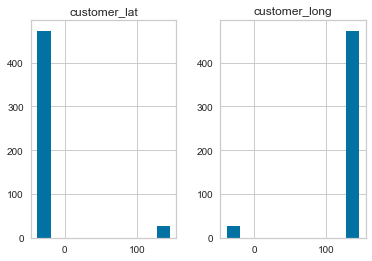

In [31]:
df_dirty_data[['customer_lat','customer_long']].hist()

In [32]:
#Describe the columsn
df_dirty_data[['customer_lat','customer_long']].describe()

,customer_lat,customer_long
count,500.000000,500.000000
mean,-27.942060,135.095884
std,41.353517,41.353177
min,-37.827738,-37.829985
25%,-37.818686,144.949407
50%,-37.811829,144.962689
75%,-37.804443,144.976857
max,145.014854,145.018208


In [33]:
df_dirty_data[['customer_lat','customer_long']].head()

,customer_lat,customer_long
0,-37.820062,145.013224
1,-37.809679,144.955368
2,-37.823350,144.976545
3,-37.814340,144.954684
4,-37.825247,144.944797


<p>
It seems in these 2 columns the data anamoly that is present is that the value for the two columns are inter-changed. This gives us wrong customer latitude and longitude causing the cusomter to appear in the other hemisphere.
    
<u>To fix this anamoly we will be swapping the recorded values of latitude and longitude.</u>

Another thing to also note for these 2 columns is that when we use the .describe() fucntion on them we see that while the mean 25%,50& and 75% reading are almost similar the std is quite high (approx 41 for both column). This does not make sense as if the values of our quatiles are so similar the std should be more near 0. 

The above finding back the observation that some values for customer latitude and longitude were swapped while recording.
</p>

In [34]:
#Create a temporary customer_lat column
df_dirty_data['customer_lat_temp'] = df_dirty_data['customer_lat']

In [35]:
#Swap the latitiude for respective longitude from the row, when ever our condition isnt met.
df_dirty_data.loc[df_dirty_data['customer_lat']+37>2,'customer_lat'] = df_dirty_data['customer_long'][df_dirty_data['customer_lat']+37>2]

In [36]:
#Swap the longitude for respective longitude from the new col we had created, when ever our condition isnt met.
df_dirty_data.loc[df_dirty_data['customer_long']<143,'customer_long'] = df_dirty_data['customer_lat_temp'][df_dirty_data['customer_long']<143]
#Delete the temporary row used during swapping
del df_dirty_data['customer_lat_temp']

In [37]:
df_dirty_data[['customer_lat','customer_long']].describe()

,customer_lat,customer_long
count,500.000000,500.000000
mean,-37.812484,144.966308
std,0.007667,0.020491
min,-37.829985,144.923068
25%,-37.818897,144.952200
50%,-37.812611,144.963569
75%,-37.806233,144.978022
max,-37.790623,145.018208


<p>

We can see that our assumption was right on correcting the data anamoly within these 2 columns the std of both the columns has almost reached 0.
 
</p>

## Distance to warehouse - Semantic Error

<p>
Distance to warehouse is another column for which we can compare the recorded value with our own calculated value to see the accuracy of the collected data.

Given the latitude and longitude of each warehouse and the corrected customer latitude and longitude, we can calculate the shortest distance between the customer and one of the warehouse.

We will be using haversine distance for our distance calculation, with the radius of earth being 6378.
</p>

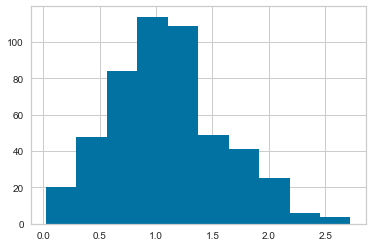

In [38]:
df_dirty_data['distance_to_nearest_warehouse'].hist()

In [39]:
#Seems like everyone lives nearby. We can 
df_dirty_data['distance_to_nearest_warehouse'].describe()

count    500.000000
mean       1.098041
std        0.492837
min        0.026500
25%        0.771500
50%        1.058250
75%        1.370650
max        2.721400
Name: distance_to_nearest_warehouse, dtype: float64

In [40]:
# Copied from : https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4
#Function to calculate haversine distance between 2 coordinate points
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6378
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 4)

In [41]:
#Function to calculate the nearest warehouse
def compute_the_nearest_warehouse(row):
    #Cusotmer Longitude
    cust_long = row.customer_long
    #Customer Latitude
    cust_lat = row.customer_lat
    #A tuple containing the name of the warehosue and the haversine_distance between the customer and the warehouse.
    dist_nickolson_fact = ('Nickolson',haversine_distance(cust_lat,cust_long,\
                                             float(warehouse_loc.loc[warehouse_loc.names == 'Nickolson','lat']),float(warehouse_loc.loc[warehouse_loc.names == 'Nickolson','lon'])))
    #A tuple containing the name of the warehosue and the haversine_distance between the customer and the warehouse.
    dist_thompson_fact = ('Thompson',haversine_distance(cust_lat,cust_long,\
                                           float(warehouse_loc.loc[warehouse_loc.names == 'Thompson','lat']),float(warehouse_loc.loc[warehouse_loc.names == 'Thompson','lon'])))
    #A tuple containing the name of the warehosue and the haversine_distance between the customer and the warehouse.
    dist_bakers_fact = ('Bakers',haversine_distance(cust_lat,cust_long,\
                                           float(warehouse_loc.loc[warehouse_loc.names == 'Bakers','lon']),float(warehouse_loc.loc[warehouse_loc.names == 'Bakers','lon'])))
    #Create a list of the above three tuple
    list_of_dist = [dist_nickolson_fact,dist_thompson_fact,dist_bakers_fact]
    #Return the tuple with the minimum distance out of the list.
    return(min(list_of_dist,key=lambda x:x[1]))  

In [42]:
#Create a new column and compute the nearest warehouse.
df_dirty_data['computed_distance_to_nearest_warehouse'] = df_dirty_data.apply(lambda x: compute_the_nearest_warehouse(x)[1],axis=1)

In [43]:
#Get count of rows where the computed distance and the recorded distance do not match
df_dirty_data.loc[(df_dirty_data.computed_distance_to_nearest_warehouse!=df_dirty_data.distance_to_nearest_warehouse),['computed_distance_to_nearest_warehouse','distance_to_nearest_warehouse']].count()

computed_distance_to_nearest_warehouse    131
distance_to_nearest_warehouse             131
dtype: int64

<p>
Seems like there are 131 rows with incorrect distance_to_nearest_warehouse. We will be fixing these errors.
</p>

In [44]:
#Replace the recorded row value of distance_to_nearest_warehouse with the computed one, wherever they do not match
df_dirty_data.loc[(df_dirty_data.computed_distance_to_nearest_warehouse!=df_dirty_data.distance_to_nearest_warehouse),'distance_to_nearest_warehouse']=\
df_dirty_data['computed_distance_to_nearest_warehouse']

In [45]:
#Get count of rows where the computed distance and the recorded distance do not match
df_dirty_data.loc[(df_dirty_data.computed_distance_to_nearest_warehouse!=df_dirty_data.distance_to_nearest_warehouse),['computed_distance_to_nearest_warehouse','distance_to_nearest_warehouse']].count()

computed_distance_to_nearest_warehouse    0
distance_to_nearest_warehouse             0
dtype: int64

## Season - Lexical and Semantic Error

<p>
It seems that Season has lexical errors as from the below code we can see that there are 2 version of the season recorded, this is a lexical error.
    
We will be fixing these errors the same as we did in nearest_warehouse column, we will replace the small-capetalized entried which their majority format.

</p>

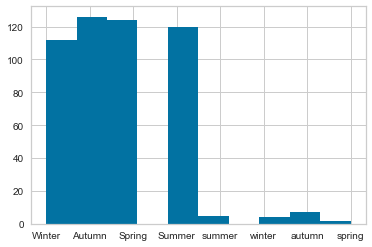

In [46]:
df_dirty_data.season.hist()

In [47]:
df_dirty_data.season.value_counts()

Autumn    126
Spring    124
Summer    120
Winter    112
autumn      7
summer      5
winter      4
spring      2
Name: season, dtype: int64

In [48]:
#Get all values into same case.
df_dirty_data.season.replace({"summer": "Summer", "autumn": "Autumn", "winter":"Winter","spring":"Spring"}, inplace = True)
df_dirty_data.season.value_counts()

Autumn    133
Spring    126
Summer    125
Winter    116
Name: season, dtype: int64

<p>
Season is again a column that can be derived from our other column 'Date'.
    
By checking which month a particular season falls on we can check if the season was correctly recorded. From the below code we can see that for a few rows the season has been incorrectly recorded according to the given specification and recorded date.

This is a form of semantic error.
</p>

In [49]:
pd.crosstab(df_dirty_data['date'].dt.month,df_dirty_data['season'])

season,Autumn,Spring,Summer,Winter
date,,,,
1,0,0,45,1
2,2,2,37,1
3,42,0,0,1
4,41,1,0,0
5,42,1,0,0
6,2,0,0,46
7,0,1,0,40
8,1,0,2,26
9,2,33,0,0


<p>
We can see that for a few dates the recorded season is not the same as the one it should be according to the assignment specification. We will then change these records season column according to their date column value.
</p>

In [50]:
#month to season dict - taken from assignment specification
month_season = {1:'Summer',2:'Summer',3:'Autumn',4:'Autumn',5:'Autumn',6:'Winter',7:'Winter',8:'Winter',9:'Spring',10:'Spring',11:'Spring',12:'Summer'}

In [51]:
#Lookup from the create dictionary and return the required season
df_dirty_data['season']=df_dirty_data['date'].apply(lambda x: month_season[x.month])

In [52]:
#Corrected seasons according to months
pd.crosstab(df_dirty_data['date'].dt.month,df_dirty_data['season'])

season,Autumn,Spring,Summer,Winter
date,,,,
1,0,0,46,0
2,0,0,42,0
3,43,0,0,0
4,42,0,0,0
5,43,0,0,0
6,0,0,0,48
7,0,0,0,41
8,0,0,0,29
9,0,35,0,0


<p>
From the above crosstab we can see all dates have been correctly classified according to their dates.
</p>

## Customer review and Satisfaction - Semantic Errors

<p>
The final 2 columns are challenging to wrangling. For the customer statisfaction reviews, since we cannot know at this point of time what the customer was thinking while writing the review, we can in no meaningful way correct the errors within the column. 

Therefore we will lower case all the reviews for further analysis.

<b>SentimentIntensityAnalyzer</b> from nltk.sentiment.vader is used to obtain the polarity score. 
    * Positive Sentiment : 'compound' polarity score >= 0.05 
    * Negative Sentiment : 'compound' polarity score < 0.05 

We will be fixing the is_happy_customer value by doing a sentiment analysis on the customer review and then based on the compound polarity score we will compute whether the customer is happy or not. 

</p>

In [53]:
#Lower case all reviews
df_dirty_data['latest_customer_review'] = df_dirty_data['latest_customer_review'].apply(lambda x:x.lower())
#Initialize sentiment analyzer from nltk
sid = SentimentIntensityAnalyzer()

In [54]:
#Do sentiment analysis on all the reviews the compound score is then stored in the new column
df_dirty_data['polarity_score'] = df_dirty_data['latest_customer_review'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [55]:
#based on our plarity score if the score is greater than 0.05 the customer should be classified as happy any less the customer is sad.
#Based on the above condition we can write the below query
#It checks if the polarity score is greater than 0.05 and is_happy_customer is false OR if the polarity score is less than 0.05 and is_happy_customer is True 
df_dirty_data.loc[((df_dirty_data['polarity_score']>0.05) \
                   & (df_dirty_data['is_happy_customer']!=True)) |\
                  ((df_dirty_data['polarity_score']<0.05) & (df_dirty_data['is_happy_customer']!=False)),['latest_customer_review','polarity_score','is_happy_customer']].head()

,latest_customer_review,polarity_score,is_happy_customer
0,good! good!,0.7494,False
1,two stars battery life is too short and no pla...,-0.2960,True
9,none,0.0000,True
12,used phone a bit too used. received used phone...,-0.2732,True
46,olivia s10+ product is good but 11 days late f...,0.5994,False


In [56]:
#Based on above discussion we will be changing the required values
#Same condition as in the above query are checked here
df_dirty_data.loc[((df_dirty_data['polarity_score']>0.05) \
                   & (df_dirty_data['is_happy_customer']!=True)) |\
                  ((df_dirty_data['polarity_score']<0.05) & (df_dirty_data['is_happy_customer']!=False)),'is_happy_customer'] = \
df_dirty_data['polarity_score'].apply(lambda x: True if x >= 0.05 else False)

In [68]:
df_dirty_data.loc[((df_dirty_data['polarity_score']>0.05) \
                   & (df_dirty_data['is_happy_customer']!=True)) |\
                  ((df_dirty_data['polarity_score']<0.05) & (df_dirty_data['is_happy_customer']!=False))]

,order_id,customer_id,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,date,shopping_cart_dict,cal_order_price,cal_order_total,computed_distance_to_nearest_warehouse,polarity_score


In [72]:
df_dirty_data

,order_id,customer_id,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,date,shopping_cart_dict,cal_order_price,cal_order_total,computed_distance_to_nearest_warehouse,polarity_score
0,ORD186940,ID1462398856,Bakers,"[('Universe Note', 1), ('Olivia x460', 2), ('p...",12640.0,71.41,-37.820062,145.013224,5,12079.41,...,False,3.8438,good! good!,True,2019-07-18,"{'Universe Note': 1, 'Olivia x460': 2, 'pearTV...",12640.0,12079.41,3.8438,0.7494
1,ORD394765,ID2189143649,Thompson,"[('iStream', 2), ('iAssist Line', 1)]",2525.0,64.43,-37.809679,144.955368,25,1958.18,...,True,0.8023,two stars battery life is too short and no pla...,False,2019-05-20,"{'iStream': 2, 'iAssist Line': 1}",2525.0,1958.18,0.8023,-0.2960
2,ORD342223,ID6282174139,Nickolson,"[('Universe Note', 2), ('Thunder line', 1)]",9080.0,65.87,-37.823350,144.976545,25,6875.87,...,False,0.8114,five stars works perfectly,True,2019-06-15,"{'Universe Note': 2, 'Thunder line': 1}",9080.0,6875.87,0.8114,0.6369
3,ORD120572,ID6167236637,Thompson,"[('Alcon 10', 1), ('Toshika 750', 1), ('iStrea...",13420.0,80.16,-37.814340,144.954684,25,10145.16,...,False,0.6949,five stars just perfect (even if att aps are u...,True,2019-04-24,"{'Alcon 10': 1, 'Toshika 750': 1, 'iStream': 1}",13420.0,10145.16,0.6949,0.5719
4,ORD431408,ID0579384316,Thompson,"[('iAssist Line', 2), ('Alcon 10', 1), ('iStre...",18020.0,66.79,-37.825247,144.944797,10,16284.79,...,False,1.4139,the battery life is real bad the phones that c...,False,2019-11-04,"{'iAssist Line': 2, 'Alcon 10': 1, 'iStream': ...",18020.0,16284.79,1.4139,-0.7906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD037521,ID6167191743,Nickolson,"[('pearTV', 2), ('Toshika 750', 1), ('Universe...",26300.0,63.15,-37.814137,144.971612,15,22418.15,...,False,0.5283,five stars these went to friends in mexico and...,True,2019-03-11,"{'pearTV': 2, 'Toshika 750': 1, 'Universe Note...",26300.0,22418.15,0.5283,0.8074
496,ORD250749,ID0638051253,Nickolson,"[('Lucent 330S', 2), ('Candle Inferno', 1)]",2890.0,83.87,-37.818078,144.966135,25,2251.37,...,True,0.3058,"not durable i used to love toshika's phones, i...",False,2019-10-31,"{'Lucent 330S': 2, 'Candle Inferno': 1}",2890.0,2251.37,0.3058,-0.0694
497,ORD046286,ID1560149605,Thompson,"[('Toshika 750', 2), ('Thunder line', 1), ('Un...",18945.0,79.98,-37.815504,144.937708,10,17130.48,...,True,0.8815,"i received an thunder as a gift, loved it so m...",True,2019-08-02,"{'Toshika 750': 2, 'Thunder line': 1, 'Univers...",18945.0,17130.48,0.8815,0.6701
498,ORD244621,ID0387152925,Thompson,"[('Universe Note', 1), ('Alcon 10', 1), ('Tosh...",16720.0,63.03,-37.806220,144.944859,15,14275.03,...,False,0.7442,my husband and i have totally enjoyed owning t...,True,2019-08-25,"{'Universe Note': 1, 'Alcon 10': 1, 'Toshika 7...",16720.0,14275.03,0.7442,0.7884


In [88]:
#Check for null rows
df_dirty_data[df_dirty_data.isna().any(axis=1)]

,order_id,customer_id,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,date,shopping_cart_dict,cal_order_price,cal_order_total,computed_distance_to_nearest_warehouse,polarity_score


In [89]:
df_dirty_data

,order_id,customer_id,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,date,shopping_cart_dict,cal_order_price,cal_order_total,computed_distance_to_nearest_warehouse,polarity_score
0,ORD186940,ID1462398856,Bakers,"[('Universe Note', 1), ('Olivia x460', 2), ('p...",12640.0,71.41,-37.820062,145.013224,5,12079.41,...,False,3.8438,good! good!,True,2019-07-18,"{'Universe Note': 1, 'Olivia x460': 2, 'pearTV...",12640.0,12079.41,3.8438,0.7494
1,ORD394765,ID2189143649,Thompson,"[('iStream', 2), ('iAssist Line', 1)]",2525.0,64.43,-37.809679,144.955368,25,1958.18,...,True,0.8023,two stars battery life is too short and no pla...,False,2019-05-20,"{'iStream': 2, 'iAssist Line': 1}",2525.0,1958.18,0.8023,-0.2960
2,ORD342223,ID6282174139,Nickolson,"[('Universe Note', 2), ('Thunder line', 1)]",9080.0,65.87,-37.823350,144.976545,25,6875.87,...,False,0.8114,five stars works perfectly,True,2019-06-15,"{'Universe Note': 2, 'Thunder line': 1}",9080.0,6875.87,0.8114,0.6369
3,ORD120572,ID6167236637,Thompson,"[('Alcon 10', 1), ('Toshika 750', 1), ('iStrea...",13420.0,80.16,-37.814340,144.954684,25,10145.16,...,False,0.6949,five stars just perfect (even if att aps are u...,True,2019-04-24,"{'Alcon 10': 1, 'Toshika 750': 1, 'iStream': 1}",13420.0,10145.16,0.6949,0.5719
4,ORD431408,ID0579384316,Thompson,"[('iAssist Line', 2), ('Alcon 10', 1), ('iStre...",18020.0,66.79,-37.825247,144.944797,10,16284.79,...,False,1.4139,the battery life is real bad the phones that c...,False,2019-11-04,"{'iAssist Line': 2, 'Alcon 10': 1, 'iStream': ...",18020.0,16284.79,1.4139,-0.7906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD037521,ID6167191743,Nickolson,"[('pearTV', 2), ('Toshika 750', 1), ('Universe...",26300.0,63.15,-37.814137,144.971612,15,22418.15,...,False,0.5283,five stars these went to friends in mexico and...,True,2019-03-11,"{'pearTV': 2, 'Toshika 750': 1, 'Universe Note...",26300.0,22418.15,0.5283,0.8074
496,ORD250749,ID0638051253,Nickolson,"[('Lucent 330S', 2), ('Candle Inferno', 1)]",2890.0,83.87,-37.818078,144.966135,25,2251.37,...,True,0.3058,"not durable i used to love toshika's phones, i...",False,2019-10-31,"{'Lucent 330S': 2, 'Candle Inferno': 1}",2890.0,2251.37,0.3058,-0.0694
497,ORD046286,ID1560149605,Thompson,"[('Toshika 750', 2), ('Thunder line', 1), ('Un...",18945.0,79.98,-37.815504,144.937708,10,17130.48,...,True,0.8815,"i received an thunder as a gift, loved it so m...",True,2019-08-02,"{'Toshika 750': 2, 'Thunder line': 1, 'Univers...",18945.0,17130.48,0.8815,0.6701
498,ORD244621,ID0387152925,Thompson,"[('Universe Note', 1), ('Alcon 10', 1), ('Tosh...",16720.0,63.03,-37.806220,144.944859,15,14275.03,...,False,0.7442,my husband and i have totally enjoyed owning t...,True,2019-08-25,"{'Universe Note': 1, 'Alcon 10': 1, 'Toshika 7...",16720.0,14275.03,0.7442,0.7884


<p> As we can see all data errors in each column has been solved</p>

In [91]:
#Writing csv file
cols = ['order_id','customer_id','date','nearest_warehouse','shopping_cart','order_price','delivery_charges','customer_lat','customer_long',\
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',\
       'distance_to_nearest_warehouse', 'latest_customer_review',\
       'is_happy_customer']
df_dirty_data[cols].to_csv('30539676_dirty_data_solution.csv',index=False)

# 3. Methodology - Missing Data<a class="anchor" id="sec_3"></a>

<p>
In this dateset we will be calculating the missing data values using other columns and logic. From the below code block we canb see that we have missing values in the following columns:

* <b>nearest_warehouse</b>:
    * By using the funtion defined above we can calculate the nearest warehouse, thus filling the missing values.
* <b>order_price</b>:
    * By using the funtion defined above we can calculate the order_rpice, thus filling the missing values.
* <b>delivery_charges</b>:
    * As the delivery_charges are dependent on multiple factors as well as the season, i will be using a linear regression model, which is trained on the outlier dataset to predict the missing values. 
* <b>order_total</b>:
    * Once all the other values are found, we can directly caluclate order_total using our previously defined funtion
* <b>distance_to_nearest_warehouse</b>:    
    * By using the funtion defined above we can calculate this distance, thus filling the missing values.
* <b>is_happy_customer</b>:
    * Based on the calculated compound polarity score we will be filling the missing values. The polarity score will be calculated using our defined fucntion.

All these column are derivative and the missing values can be calculated from the other columns. However to fill the missing values in some of the rows we first have to fill the missing values in other column, hence the order in which we impute these missing values becomes important.

</p>

In [ ]:
df_missing_data.isna().sum()

In [ ]:
df_missing_data.shape

## Nearest Warehouse

<p>
Using the function we defined in our previous part we can fill the values for this column, as we have all the required data to compute this. i.e warehouse and customer latitude/longitude.
</p>

In [ ]:
df_missing_data[df_missing_data['nearest_warehouse'].isnull()]

In [ ]:
#impute the missing values using the function previously defined
df_missing_data.loc[df_missing_data['nearest_warehouse'].isnull(),'nearest_warehouse'] = df_missing_data.apply(lambda x: compute_the_nearest_warehouse(x)[0],axis=1)

In [ ]:
#Check again if null values have been filled
df_missing_data[df_missing_data['nearest_warehouse'].isnull()]

## Distance to nearest warehouse

<p>
Again using the function defined in our previous part we can caluclate the values for this column.
</p>

In [ ]:
#Check for null values
df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isnull()].head()

In [ ]:
#impute the missing values using the function previously defined
df_missing_data.loc[df_missing_data['distance_to_nearest_warehouse'].isnull(),'distance_to_nearest_warehouse'] =df_missing_data.apply(lambda x: compute_the_nearest_warehouse(x)[1],axis=1)

In [ ]:
#Check again if null values have been filled
df_missing_data[df_missing_data['distance_to_nearest_warehouse'].isnull()]

## Customer review and Satisfaction

<p>
Based on the customer review we can use the fucntion defined previously to calculate the polarity score and based on that we can impute the missing values for is_happy_customer.

</p>

In [ ]:
# Lower case the cusotmer reviews and initialize the sentiment intensity analyzer
df_missing_data['latest_customer_review'] = df_missing_data['latest_customer_review'].apply(lambda x:x.lower())
sid = SentimentIntensityAnalyzer()

In [ ]:
df_missing_data['polarity_score'] = df_missing_data['latest_customer_review'].apply(lambda x:sid.polarity_scores(x)['compound'])

In [ ]:
#Check for missing values
df_missing_data.loc[df_missing_data['is_happy_customer'].isnull(),['order_id','is_happy_customer','polarity_score']]

In [ ]:
#Impute the missing values
df_missing_data.loc[df_missing_data['is_happy_customer'].isnull(),'is_happy_customer'] = df_missing_data['polarity_score'].apply(lambda x: 1 if x >= 0.05 else 0)

In [ ]:
#Check again if null values have been filled
df_missing_data[df_missing_data['is_happy_customer'].isnull()]

## Order Price

<p>

Since there are no missing values in our shopping_cart attribute we can calculate the values of order_price based on items in the shopping_cart using our fucntion.

</p>

In [ ]:
#Converting the value in the column to a dictionary for easier manipulation later on
df_missing_data['shopping_cart_dict'] = df_missing_data['shopping_cart'].apply(lambda x:dict(eval(x)))

In [ ]:
#check for missing values
df_missing_data[df_missing_data['order_price'].isnull()].head()

In [ ]:
#Calculate using defined fucntion
df_missing_data.loc[df_missing_data['order_price'].isnull(),'order_price'] = df_missing_data.apply(lambda x:cal_shopping_cart_price(x,item_to_price_dict),axis=1)

In [ ]:
#Check again if null values have been filled
df_missing_data[df_missing_data['order_price'].isnull()].head()

## Delivery Charges

<p>

Imputing the values for delivery charges presents a problem. The value of delivery_charges depends on different factors. They are:
* Distance between nearest warehosue and customer
* whether the customer wants expedited delivery
* Whether the customer was happy with his/her last purchase.

Based on the above factors, we will need to compute the values of delivery_charges according to changing factors.

We will be building a linear model per season that will linearly try to predict the value of a single order based on the above defined factors. Also since we have missing values in our current dataset, we will be using the outliers dataset to train ur models. As it is given in the assignment and form our observation below, the outliers present in that dataset will not effect our models for missing dataset as much.

Moreover since both the dataset follow the same business rules our models mwill be able to accurately predict the missing values depending on seasons.
</p>

In [ ]:
df_missing_data.isnull().sum()

In [ ]:
df_missing_data['season'].value_counts()

<p>
We first defined different datasets to train our model according to the season.

</p>

In [ ]:
df_Summer = df_outlier_data[df_outlier_data['season']=='Summer'][['delivery_charges','distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
df_Autumn = df_outlier_data[df_outlier_data['season']=='Autumn'][['delivery_charges','distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
df_Spring = df_outlier_data[df_outlier_data['season']=='Spring'][['delivery_charges','distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]
df_Winter = df_outlier_data[df_outlier_data['season']=='Winter'][['delivery_charges','distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']]

<p>
Now we will try to impute the missing values one by one for each season.

For each of the season below the following steps are being taken place:

1. Define a variable mask which has the condition of the season and whether the value for delivery_charges are null or not.
2. Check for missing values using the mask.
3. Create a linear model and fit it using the defined season subset of outliers dataset.
4. Create a list of index with the null values.
5. For corresponsing values in the dataframe for the list of index with null values predict the values using the build linear model.
</p>

## Summer 

In [ ]:
#1. Create a mask for summer and null
mask = (df_missing_data.season=='Summer')&(df_missing_data.delivery_charges.isnull())

In [ ]:
#2. Check for null values
df_missing_data['delivery_charges'][mask]

In [ ]:
#3. create and fit a linear model
linearModel = LinearRegression()
linearModel.fit(df_Summer[[x for x in df_Summer.columns if x!='delivery_charges']],df_Summer['delivery_charges'])
#4.Create a list of indexes with null values.
index_with_null = list(df_missing_data['delivery_charges'][mask].index)
index_with_null
#5.Impute the values using the build inear model
df_missing_data.loc[index_with_null,'delivery_charges']=linearModel.predict(df_missing_data[mask][['delivery_charges','distance_to_nearest_warehouse','is_expedited_delivery',"is_happy_customer"]].drop(['delivery_charges'],axis=1))

df_missing_data.isnull().sum()

## Winter

In [ ]:
#1. Create a mask for winter and null
mask = (df_missing_data.season=='Winter')&(df_missing_data.delivery_charges.isnull())

In [ ]:
#2. Check for null values
df_missing_data['delivery_charges'][mask]

In [ ]:
#3. create and fit a linear model
linearModel = LinearRegression()
linearModel.fit(df_Winter[[x for x in df_Winter.columns if x!='delivery_charges']],df_Winter['delivery_charges'])
#4.Create a list of indexes with null values.
index_with_null = list(df_missing_data['delivery_charges'][mask].index)
index_with_null
#5.Impute the values using the build inear model
df_missing_data.loc[index_with_null,'delivery_charges']=linearModel.predict(df_missing_data[mask][['delivery_charges','distance_to_nearest_warehouse','is_expedited_delivery',"is_happy_customer"]].drop(['delivery_charges'],axis=1))

df_missing_data.isnull().sum()

## Autumn

In [ ]:
#1. Create a mask for autumn and null
mask = (df_missing_data.season=='Autumn')&(df_missing_data.delivery_charges.isnull())

In [ ]:
#2. Check for null values
df_missing_data['delivery_charges'][mask]

In [ ]:
#3. create and fit a linear model
linearModel = LinearRegression()
linearModel.fit(df_Autumn[[x for x in df_Autumn.columns if x!='delivery_charges']],df_Autumn['delivery_charges'])
#4.Create a list of indexes with null values.
index_with_null = list(df_missing_data['delivery_charges'][mask].index)
index_with_null
#5.Impute the values using the build inear model
df_missing_data.loc[index_with_null,'delivery_charges']=linearModel.predict(df_missing_data[mask][['delivery_charges','distance_to_nearest_warehouse','is_expedited_delivery',"is_happy_customer"]].drop(['delivery_charges'],axis=1))

df_missing_data.isnull().sum()

## Spring

In [ ]:
#1. Create a mask for spring and null
mask = (df_missing_data.season=='Spring')&(df_missing_data.delivery_charges.isnull())

In [ ]:
#2. Check for null values
df_missing_data['delivery_charges'][mask]

In [ ]:
#3. create and fit a linear model
linearModel = LinearRegression()
linearModel.fit(df_Spring[[x for x in df_Spring.columns if x!='delivery_charges']],df_Spring['delivery_charges'])
#4.Create a list of indexes with null values.
index_with_null = list(df_missing_data['delivery_charges'][mask].index)
index_with_null
#5.Impute the values using the build inear model
df_missing_data.loc[index_with_null,'delivery_charges']=linearModel.predict(df_missing_data[mask][['delivery_charges','distance_to_nearest_warehouse','is_expedited_delivery',"is_happy_customer"]].drop(['delivery_charges'],axis=1))

df_missing_data.isnull().sum()

<p>
All values for delivery_charges have been imputed depending on the season and the given business rules.

</p>

## Order Total

<p>
Now that we have imputed the values for delivery charges, using our previously defined
</p>

In [ ]:
df_missing_data.loc[df_missing_data.order_total.isnull(),'order_total'] =\
df_missing_data.apply(lambda x: cal_order_total(x),axis=1)

In [ ]:
df_missing_data.isnull().sum()

In [ ]:
#Writing csv file
cols = ['order_id','customer_id','date','nearest_warehouse','shopping_cart','order_price','delivery_charges','customer_lat','customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer']
df_missing_data.to_csv('30539676_missing_data_solution.csv',columns=cols,index=False)

# 4. Methodology - Outliers<a class="anchor" id="sec_4"></a>
<p>
We will be detecting outliers within our delivery_charges attributes, however since the attribute is dependent on multiple other attributes (season, whether the customer is happy or not, etc) we will be using a linear model to detect the outliers.
    
A linear model will be trained on the dependednt attributes. Using that model we will be plotting 2 graphs:
* Residual plot
* Cooks Distance plot

Within these 2 plots we will be able to identify the outliers for that model. Since it is given in our specification that for each season the linear model will be different, we will be training 4 models 1 for each season. Based on these models the outliers for their respective season will be identified.

Once all the outliers for each season is identified, based on their indexes we will remove the outliers from our dataframe.

A brief description on how the above mentioned plots are used:

* Residual plot - This plot help us determine the error rate of our model. Intuitively once we have removed the outliers form our model, the $R^2$ value should increase getting us a more accurate model.

* Cooks Distance plot - this plot is used to identify the outliers. Any point beyong the threshold is condiered an outlier.

</p>

In [ ]:
#Attribute for the model
cols = ['delivery_charges','distance_to_nearest_warehouse','is_expedited_delivery','is_happy_customer']

In [ ]:
#Converting our categorical feature into numeric feature
df_outlier_data['is_expedited_delivery']=df_outlier_data['is_expedited_delivery'].apply(lambda x: 1 if x is True else 0)
df_outlier_data['is_happy_customer']=df_outlier_data['is_happy_customer'].apply(lambda x: 1 if x is True else 0)

# spring

In [ ]:
#Create linear model
linearModel = LinearRegression()
#Select the season
mask = df_outlier_data['season']=='Spring'
#Create a residual plot
visualizer_residuals = ResidualsPlot(linearModel)\
#Fit the model
visualizer_residuals.fit(df_outlier_data[mask][[x for x in cols if x!='delivery_charges']],df_outlier_data[mask]['delivery_charges'])
visualizer_residuals.show()

<p>
We can see that there are multiple ourliers within the dataset.
    
One thing to note for all residual plot is that they are almost symetric about the origin, while having high density of points near the origin and low density beyond the origin.
</p>

In [ ]:
#Cooks distance
visualizer_residuals = CooksDistance()
#Select season
mask = df_outlier_data['season']=='Spring'
#Fitting the model
visualizer_residuals.fit(df_outlier_data[mask][[x for x in cols if x!='delivery_charges']],df_outlier_data[mask]['delivery_charges'])
visualizer_residuals.show()

In [ ]:
#Data points index beyond the threshold(0.03)
i_less_influential = (visualizer_residuals.distance_ <= 0.03)
#Select season
mask = df_outlier_data['season']=='Spring'
#Get X and Y values accoridng the split. Here X_li_Spring our the values to be kept 
X_li_spring, y_li_spring = df_outlier_data[mask][[x for x in cols if x!='delivery_charges']][i_less_influential], df_outlier_data[mask]['delivery_charges'][i_less_influential]
#Create model
model = LinearRegression()
#Create residual plot
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_li_spring, y_li_spring)
visualizer_residuals.show()

# Autumn

In [ ]:
#Create model
linearModel = LinearRegression()
#Select season
mask = df_outlier_data['season']=='Autumn'
#Create a residual plot
visualizer_residuals = ResidualsPlot(linearModel)
#Fit the model
visualizer_residuals.fit(df_outlier_data[mask][[x for x in cols if x!='delivery_charges']],df_outlier_data[mask]['delivery_charges'])
visualizer_residuals.show()

In [ ]:
#Cooks distance
visualizer_residuals = CooksDistance()
#Select season
mask = df_outlier_data['season']=='Autumn'
#Fit the model
visualizer_residuals.fit(df_outlier_data[mask][[x for x in cols if x!='delivery_charges']],df_outlier_data[mask]['delivery_charges'])
visualizer_residuals.show()

In [ ]:
#Data points index beyond the threshold(0.04)
i_less_influential = (visualizer_residuals.distance_ <= 0.04)
#Select season
mask = df_outlier_data['season']=='Autumn'
#Get X and Y values accoridng the split. Here X_li_autumn our the values to be kept
X_li_autumn, y_li_autumn = df_outlier_data[mask][[x for x in cols if x!='delivery_charges']][i_less_influential], df_outlier_data[mask]['delivery_charges'][i_less_influential]
#Create model
model = LinearRegression()
#Create residual plot
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_li_autumn, y_li_autumn)
visualizer_residuals.show()

# Winter

In [ ]:
#Create model
linearModel = LinearRegression()
#Select season
mask = df_outlier_data['season']=='Winter'
#Create model
visualizer_residuals = ResidualsPlot(linearModel)
#Fit the model
visualizer_residuals.fit(df_outlier_data[mask][[x for x in cols if x!='delivery_charges']],df_outlier_data[mask]['delivery_charges'])
visualizer_residuals.show()

In [ ]:
#Cooks distance
visualizer_residuals = CooksDistance()
#Select season
mask = df_outlier_data['season']=='Winter'
#Fit the model
visualizer_residuals.fit(df_outlier_data[mask][[x for x in cols if x!='delivery_charges']],df_outlier_data[mask]['delivery_charges'])
visualizer_residuals.show()

In [ ]:
#Data points index beyond the threshold(0.03)
i_less_influential = (visualizer_residuals.distance_ <= 0.03)
#Select season
mask = df_outlier_data['season']=='Winter'
#Get X and Y values accoridng the split. Here X_li_winter our the values to be kept
X_li_winter, y_li_winter = df_outlier_data[mask][[x for x in cols if x!='delivery_charges']][i_less_influential], df_outlier_data[mask]['delivery_charges'][i_less_influential]
#Create model
model = LinearRegression()
#Create residual plot
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_li_winter, y_li_winter)
visualizer_residuals.show()

# Summer

In [ ]:
#Create model
linearModel = LinearRegression()
#Select season
mask = df_outlier_data['season']=='Summer'
#Create model
visualizer_residuals = ResidualsPlot(linearModel)
#Fit the model
visualizer_residuals.fit(df_outlier_data[mask][[x for x in cols if x!='delivery_charges']],df_outlier_data[mask]['delivery_charges'])
visualizer_residuals.show()

In [ ]:
#Cooks distance
visualizer_residuals = CooksDistance()
#Select season
mask = df_outlier_data['season']=='Summer'
#Fit the model
visualizer_residuals.fit(df_outlier_data[mask][[x for x in cols if x!='delivery_charges']],df_outlier_data[mask]['delivery_charges'])
visualizer_residuals.show()

In [ ]:
#Data points index beyond the threshold(0.03)
i_less_influential = (visualizer_residuals.distance_ <= 0.03)
#Select season
mask = df_outlier_data['season']=='Summer'
#Get X and Y values accoridng the split. Here X_li_summer our the values to be kept
X_li_summer, y_li_summer = df_outlier_data[mask][[x for x in cols if x!='delivery_charges']][i_less_influential], df_outlier_data[mask]['delivery_charges'][i_less_influential]
#Create model
model = LinearRegression()
#Create residual plot
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_li_summer, y_li_summer)
visualizer_residuals.show()

<p>
For each of the above models, we will be keepeing the X_li split of the model. This contains the all the datapoints minus the outliers. 

</p>

In [ ]:
#Create a list of indexes to keep
to_keep_index = list(X_li_spring.index)+list(X_li_autumn.index)+list(X_li_summer.index)+list(X_li_winter.index)
#Keep only the above index
df_outlier_data=df_outlier_data.iloc[to_keep_index]

In [ ]:
#Reverting to original format
df_outlier_data['is_expedited_delivery']=df_outlier_data['is_expedited_delivery'].apply(lambda x: True if x is 1 else False)
df_outlier_data['is_happy_customer']=df_outlier_data['is_happy_customer'].apply(lambda x: True if x is 1 else False)

In [ ]:
#Writing csv file
cols = ['order_id','customer_id','date','nearest_warehouse','shopping_cart','order_price','delivery_charges','customer_lat','customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer']
df_outlier_data.to_csv('30539676_outlier_data_solution.csv',columns=cols,index=False)

# 5. Summary<a class="anchor" id="sec_5"></a>
<p>

In conclusion the following things have veen completed :
    * Dirt data - All data anamolies have been identified and corrected.
    * Missing data - All missing values have been filled in.
    * Outlier data - All outliers have been identified and removed.

* <b>Dirty Data</b>: All lexical, semantical and syntactical errros have been found and then removed from the dataset as per our assignment specification.
* <b>Missing Data</b>: All the null values within out column have been imputed. They are either calculated using other attributes or using a linear regression model.
* <b>Outlier Data</b>: THe outlier from delivery_charges are removed by using cooks distance & residual plots.

</p>

# 6. References<a class="anchor" id="sec_6"></a>

Rakesh (2018, August 13). Change dd-mm-yyyy date format of dataframe date column to yyyy-mm-dd. \
Retrieved from: https://stackoverflow.com/questions/51822956/change-dd-mm-yyyy-date-format-of-dataframe-date-column-to-yyyy-mm-dd

Dario Radečić (2020, April 14). Here’s How To Calculate Distance Between 2 Geolocations in Python \
Retrived from: https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4

The SciPy community(2020, June 29). numpy.linalg.solve \
Retrieved from: https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html#numpy.linalg.solve

NLTK Project.(2020, April 13). nltk.sentiment package \
Retrieved from: https://www.nltk.org/api/nltk.sentiment.html#nltk.sentiment.vader.SentimentIntensityAnalyzer.score_valence

Pandas Documentation (2020, October 05). Pandas Documentation \
Retrieved from: https://pandas.pydata.org/docs/